In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [57]:
df = pd.read_csv("fcc-forum-pageviews.csv",index_col="date",parse_dates=True)

In [58]:
df_clean = (df[(df['value'] >= df['value'].quantile(0.025))&
              (df['value'] <= df['value'].quantile(0.975))])

In [59]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(18,7))
    ax.plot(df_clean,color="red")
    ax.set(xlabel = "Date",ylabel = "Page Views",title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    fig.savefig('line_plot.png')
    return fig

In [60]:
def draw_bar_plot():
    df_bar = df_clean.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year','month'])['value'].mean()
    df_bar = df_bar.unstack()
    fig = df_bar.plot(kind='bar', figsize=(15,12)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],
               title='Months', loc='upper left')
    fig.savefig('bar_plot.png')
    return fig

In [61]:
def draw_box_plot():  
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    fig, axes = plt.subplots(1,2,figsize=(25,8))
    sns.boxplot(data=df_box,x="year",y="value",ax=axes[0],fliersize=2.5)
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box,x="month",y="value",order=month_order,ax=axes[1],fliersize=2.5)
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")
    fig.savefig('box_plot.png')
    return fig





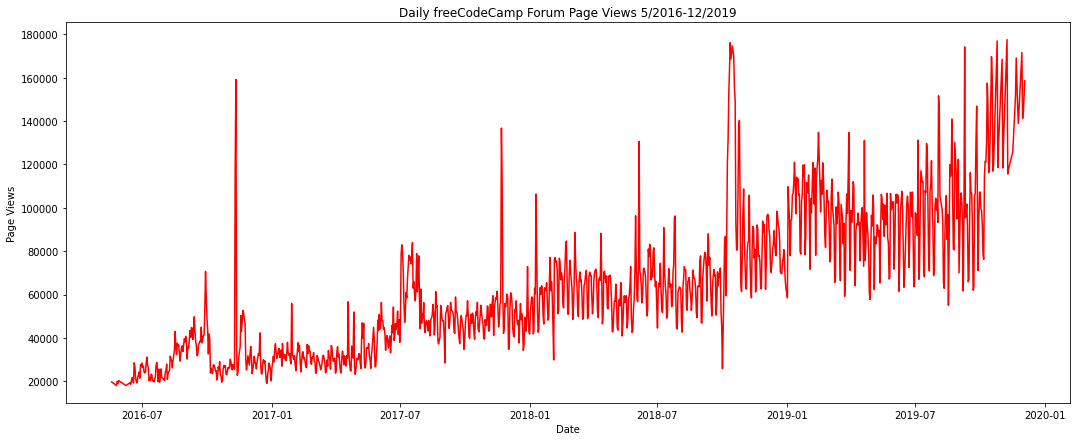

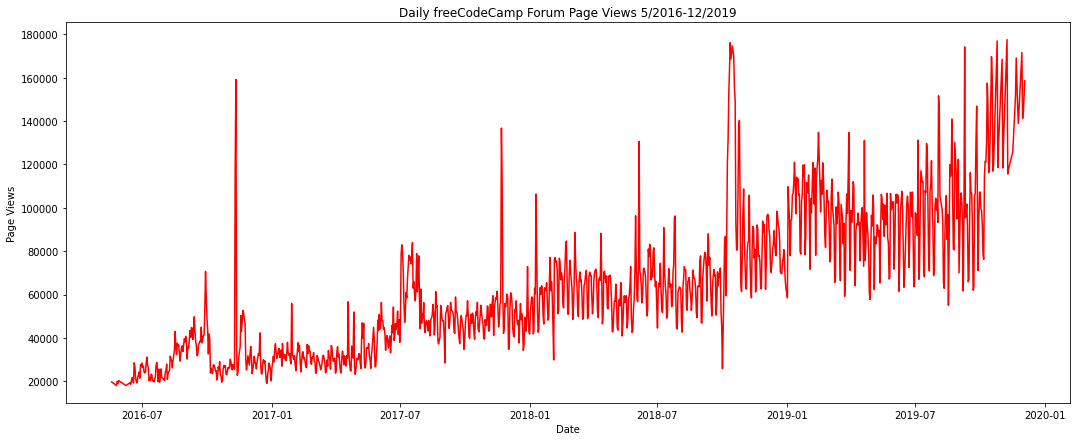

In [62]:
draw_line_plot()

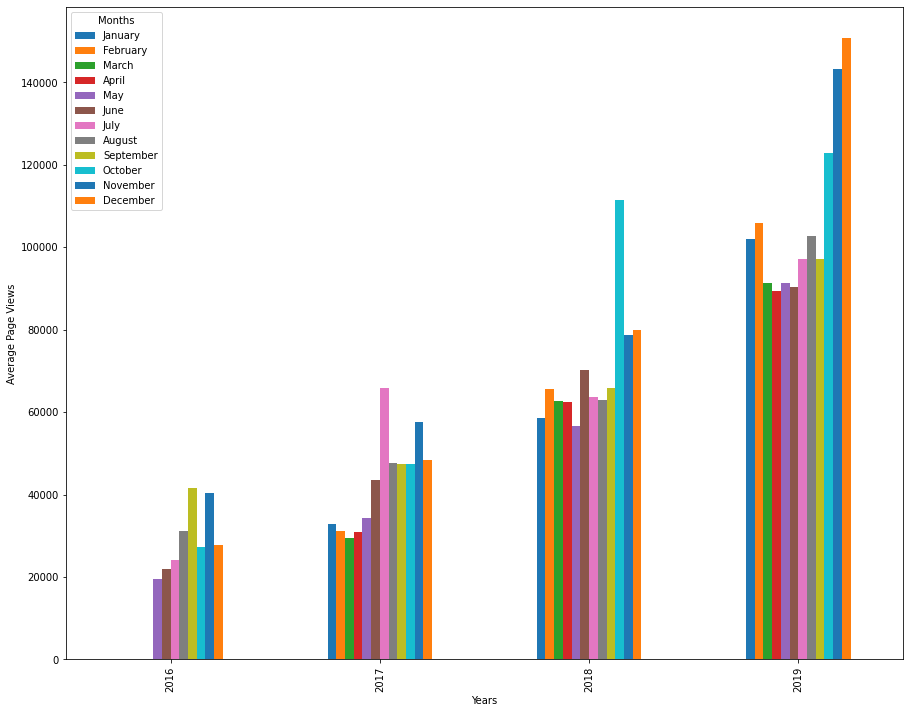

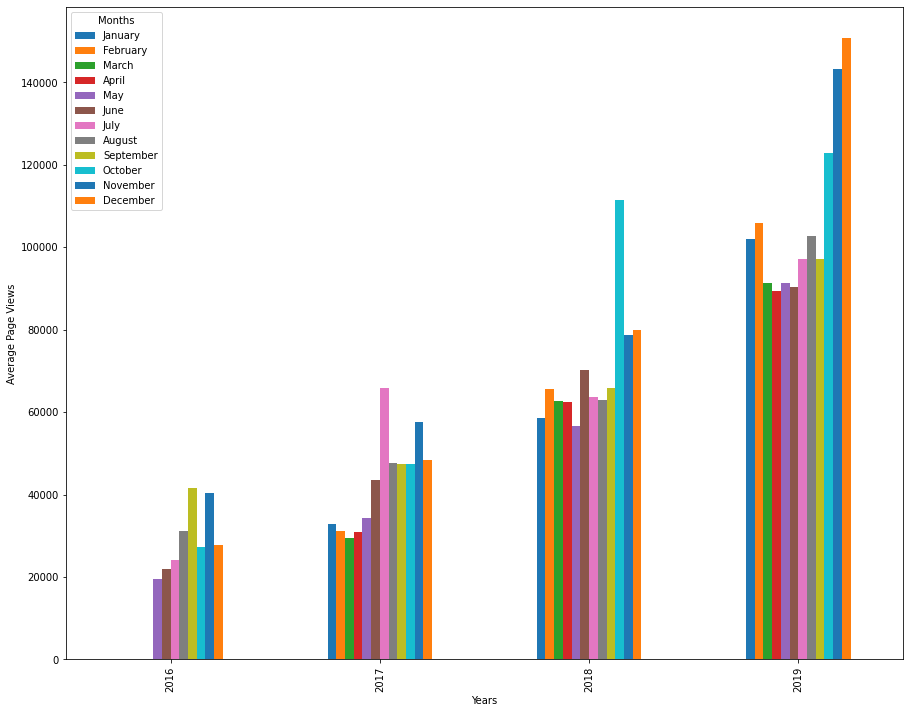

In [63]:
draw_bar_plot()

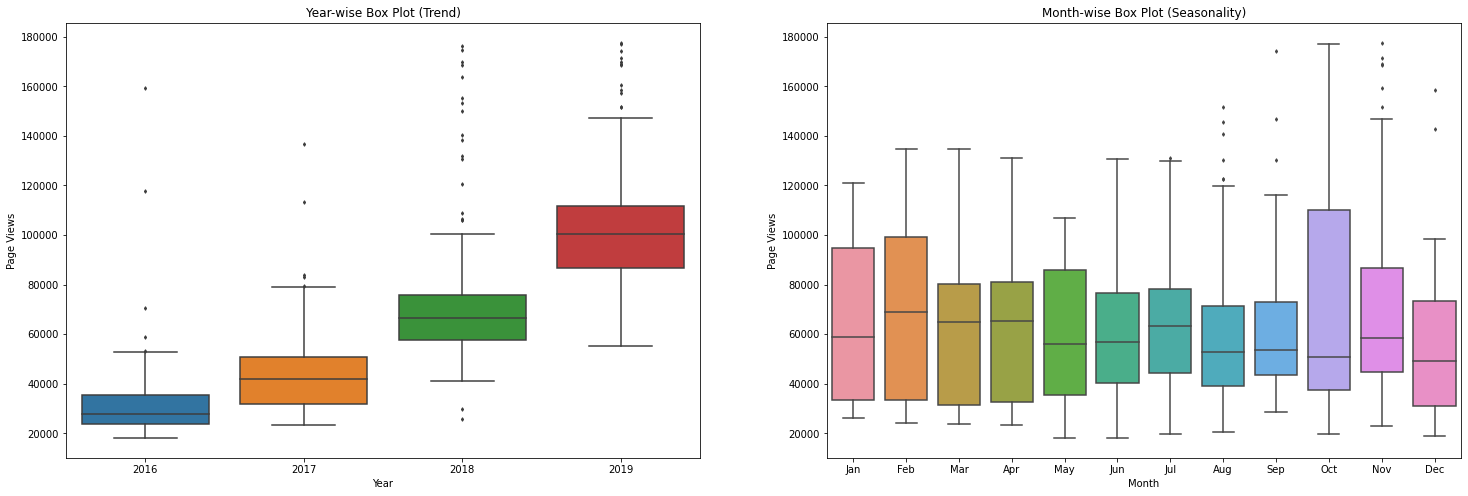

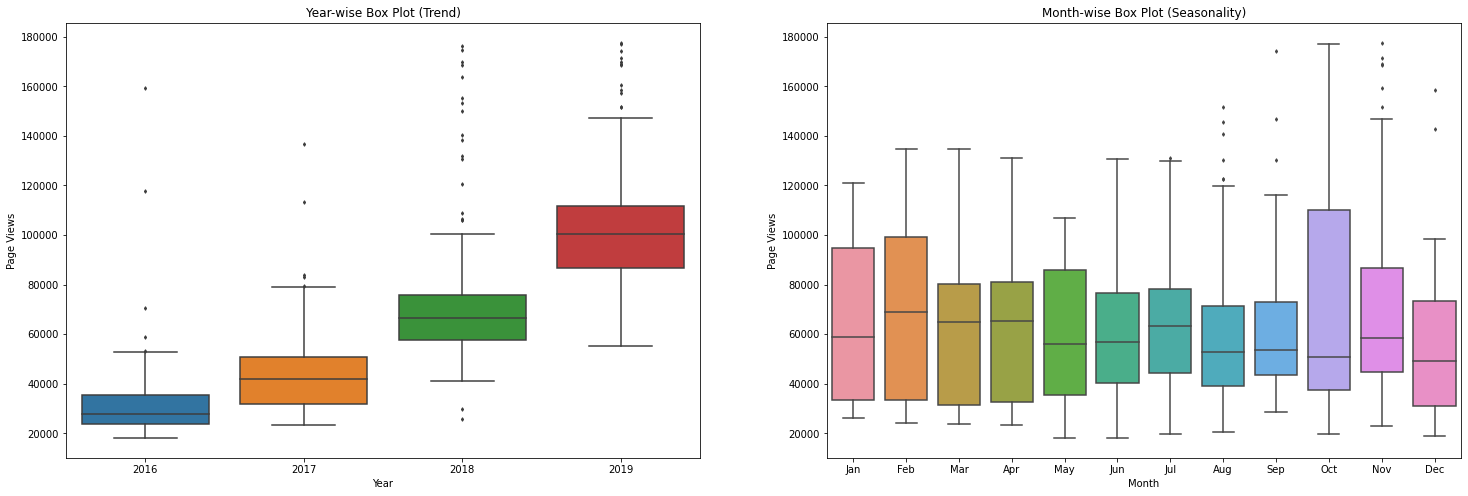

In [64]:
draw_box_plot()